# CKAマトリクスの可視化

## CSVファイルから

In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

def plot_cka(df, ax=None, cmap="coolwarm", vmin=0, vmax=1, title=None, cbar=False):
    """
    1つのCKA CSVファイルをヒートマップとして描画する関数。

    Parameters
    ----------
    csv_path : str
        CKA行列を格納したCSVファイルのパス
    ax : matplotlib.axes.Axes, optional
        描画先のAxes（指定しない場合は新規作成）
    cmap : str
        カラーマップ（例: "viridis", "coolwarm"）
    vmin, vmax : float
        カラースケールの範囲（CKA値に合わせて0〜1を指定するのが一般的）
    title : str
        サブタイトルやエポック番号など
    """
    
    # === 描画先のAxes設定 ===
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 5))
    
    # === ヒートマップ + カラーバー付き ===
    sns.heatmap(
        df,
        ax=ax,
        cmap=cmap,
        vmin=vmin,
        vmax=vmax,
        cbar=cbar,  # ← カラーバー表示
        cbar_kws={"label": "CKA similarity"}  # ← 凡例ラベル
    )
    
    # === y軸を反転 ===
    ax.invert_yaxis()

    # === 軸とタイトル ===
    ax.set_xlabel("Student Layer")
    ax.set_ylabel("Teacher Layer")
    ax.set_title(title)
    return ax


def plot_all_cka_in_folder(folder_path, max_cols=4):
    """
    指定フォルダ内のすべてのCKA CSVファイルをグリッド表示する関数。
    
    Parameters
    ----------
    folder_path : str
        CKA CSVファイル群があるディレクトリ
    max_cols : int
        一行あたりに並べるヒートマップの数
    """
    # === ファイル一覧取得 ===
    csv_files = sorted(glob.glob(os.path.join(folder_path, "cka_epoch_*.csv")))
    if not csv_files:
        print("No CSV files found in:", folder_path)
        return
    
    n = len(csv_files)
    ncols = min(max_cols, n)
    nrows = (n + ncols - 1) // ncols  # 行数を自動計算
    
    # === Figure作成 ===
    fig, axes = plt.subplots(nrows, ncols, figsize=(4*ncols, 4*nrows))
    axes = axes.flatten() if n > 1 else [axes]
    
    # === 各ファイルを順に描画 ===
    for i, csv_path in enumerate(csv_files):
        epoch_name = os.path.splitext(os.path.basename(csv_path))[0]
        # === CSVをDataFrameとして読み込み ===
        df = pd.read_csv(csv_path, header=0)
        plot_cka(df, ax=axes[i], title=epoch_name)
    
    # === 余白調整 ===
    for j in range(i+1, len(axes)):
        axes[j].axis("off")  # 残りの空欄を非表示にする
    
    plt.tight_layout()
    plt.show()

def show_json_info(json_path, keys=None):
    """
    JSONファイルの内容を表示する関数。
    keys を None にすると全項目を表示。
    keys にリストを渡すと、その項目だけ表示。
    """
    try:
        with open(json_path, "r", encoding="utf-8") as f:
            data = json.load(f)
    except FileNotFoundError:
        print(f"[Error] File not found: {json_path}")
        return
    except json.JSONDecodeError:
        print(f"[Error] Invalid JSON format: {json_path}")
        return

    # print(f"=== {json_path} ===")

    # keysが指定されていない場合 → 全項目出力
    if keys is None:
        for key, value in data.items():
            print(f"{key}: {value}")
    else:
        # 指定されたキーのみ出力
        for key in keys:
            if key in data:
                print(f"{key}: {data[key]}")
            else:
                print(f"{key}: [キーが存在しません]")


In [18]:
import os
# ==== 基本ディレクトリ ====
base_dir = os.path.join("..", "save", "students", "models")

for i in (os.listdir(base_dir)):
    print("\"", i, "\"", ",", sep="")


"S_vgg16_bn-T_vgg16_bn-cifar10-trial_0-epochs_240-bs_64-ckad-cls_1.0-div_1.0-beta_1.0-20251020_092117",
"S_vgg16_bn-T_vgg16_bn-cifar10-trial_0-epochs_240-bs_64-kd-cls_1.0-div_1.0-beta_1.0-20251020_102340",
"S_vgg16_bn-T_vgg16_bn-cifar100-trial_0-epochs_240-bs_64-ckad-cls_1.0-div_1.0-beta_10.0-20251020_132022",
"S_vgg16_bn-T_vgg16_bn-cifar100-trial_0-epochs_240-bs_64-ckad-cls_1.0-div_1.0-beta_10.0-20251020_185856",
"S_vgg16_bn-T_vgg16_bn-cifar100-trial_0-epochs_240-bs_64-ckad-cls_1.0-div_1.0-beta_10.0-20251023_110635",
"S_vgg16_bn-T_vgg16_bn-cifar100-trial_0-epochs_240-bs_64-ckad-cls_1.0-div_1.0-beta_10.0-20251023_121226",
"S_vgg16_bn-T_vgg16_bn-cifar100-trial_0-epochs_240-bs_64-ckad-cls_1.0-div_1.0-beta_10.0-20251023_131941",
"S_vgg16_bn-T_vgg16_bn-cifar100-trial_0-epochs_240-bs_64-ckad-cls_1.0-div_1.0-beta_10.0-20251023_143449",
"S_vgg16_bn-T_vgg16_bn-cifar100-trial_0-epochs_240-bs_64-ckad-cls_1.0-div_1.0-beta_10.0-20251023_164110",
"S_vgg16_bn-T_vgg16_bn-cifar100-trial_0-epochs_240-b

distill: ckad
layer_usage: all
           0         1         2         3         4         5         6  \
0   0.815961  0.595175  0.532069  0.473019  0.414459  0.380484  0.337868   
1   0.807616  0.592592  0.517427  0.454988  0.398285  0.369696  0.333313   
2   0.667840  0.572061  0.518132  0.436427  0.362039  0.355419  0.313961   
3   0.631805  0.586599  0.526603  0.445910  0.363318  0.365021  0.319229   
4   0.567497  0.587668  0.489413  0.419246  0.347588  0.352548  0.302609   
5   0.558742  0.586470  0.489369  0.422131  0.350257  0.357082  0.307265   
6   0.485752  0.557072  0.462560  0.400658  0.330789  0.339610  0.285247   
7   0.442022  0.539280  0.441952  0.382237  0.317921  0.329735  0.277379   
8   0.413551  0.524311  0.426192  0.367912  0.304090  0.317043  0.264130   
9   0.393410  0.512943  0.414541  0.356904  0.294744  0.307931  0.255915   
10  0.375259  0.501417  0.403443  0.346220  0.283963  0.298502  0.248512   
11  0.359550  0.490268  0.395473  0.339557  0.278898  0.2

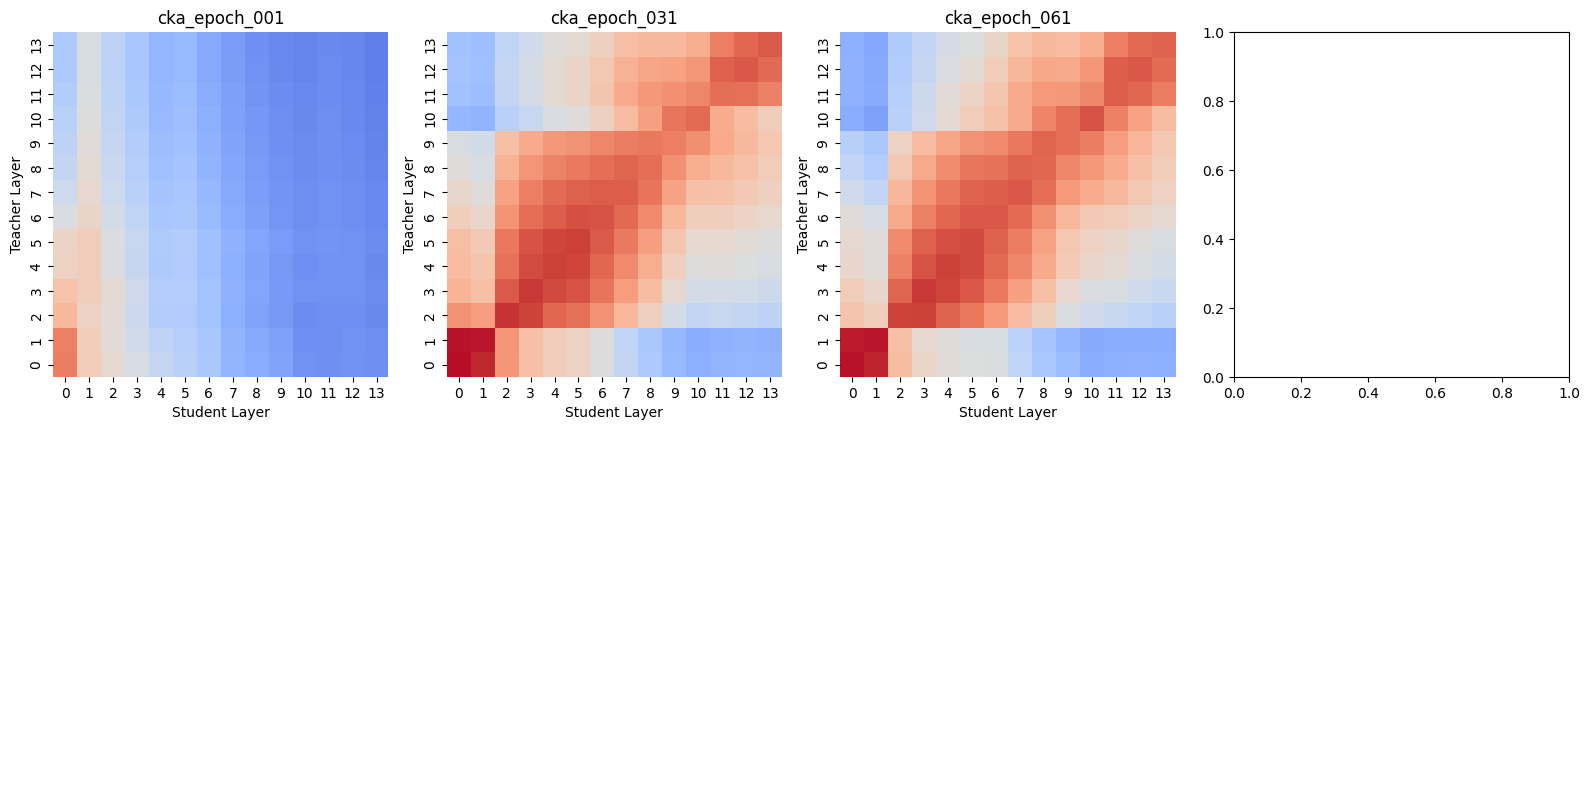

In [19]:
import os
base_dir = os.path.join("..", "save")

model_name = "S_vgg16_bn-T_vgg16_bn-cifar100-trial_0-epochs_240-bs_64-ckad-cls_1.0-div_1.0-beta_10.0-20251020_185856"
cka_name = "cka_log_" + model_name

cka_dir = os.path.join(base_dir, "cka_logs", cka_name) # folder
json_path = os.path.join(base_dir, "students", "models", model_name, "parameters.json")

show_json_info(json_path, keys=["distill", "layer_usage"])
plot_all_cka_in_folder(cka_dir)

## モデルの推論結果から

In [2]:
import torch
import os
import sys
import torch.nn as nn
import numpy as np

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from models import model_dict
from cka.LinearCKA import linear_CKA
from helper.util import safe_flatten_and_mean

from dataset.cifar10 import get_cifar10_dataloaders
from dataset.cifar100 import get_cifar100_dataloaders
from dataset.cinic10 import get_cinic10_dataloaders    

from helper.hooks import register_hooks

def load_teacher(model_name, n_cls, gpu=None):
    """Load teacher model using model directory"""
    model_dir = os.path.join("..", "save", "teachers", "models", model_name)

    # --- parameters.json を読み込み ---
    param_path = os.path.join("..", "save", "teachers", "models", model_name, "parameters.json")
    if not os.path.exists(param_path):
        raise FileNotFoundError(f"parameters.json not found in {model_name}")

    with open(param_path, "r") as f:
        params = json.load(f)

    model_name = params["model"]

    # --- モデル構築 ---
    model = model_dict[model_name](num_classes=n_cls)

    # --- .pth ファイルを自動検出 ---
    pth_files = [f for f in os.listdir(model_dir) if f.endswith(".pth")]
    if not pth_files:
        raise FileNotFoundError(f"No .pth file found in {model_dir}")
    model_path = os.path.join(model_dir, pth_files[0])  # 最初の1個を使用
    print(f"Loading weights: {pth_files[0]}")

    # --- 重み読み込み ---
    map_location = None if gpu is None else {'cuda:0': f'cuda:{gpu}'}
    state_dict = torch.load(model_path, map_location=map_location)
    if "model" in state_dict:
        state_dict = state_dict["model"]
    model.load_state_dict(state_dict)

    return model, model_name

def get_feature(dataset, model_name_t, gpu=None, batch_size=64, num_workers=2):
    gpu = int(gpu) if gpu and gpu.isdigit() else None
    gpu_id = int(gpu) if gpu and gpu.isdigit() else None    

    # deviceオブジェクトを定義
    device = torch.device(f'cuda:{gpu}' if torch.cuda.is_available() and gpu is not None else 'cpu')
    print(f"Using device: {device}")

    if gpu is not None:
        print("Use GPU: {} for training".format(gpu))
    else:
        print("No GPU detected. Using CPU for training.")

    # dataset
    n_cls = {
        'cifar10':10,
        'cifar100': 100,
        'imagenet': 1000,
        'cinic10': 10
    }

    # dataloader
    print(f"==> Loading dataset: {dataset}...")
    if dataset == 'cifar10':
        train_loader, val_loader = get_cifar10_dataloaders(batch_size=batch_size, num_workers=num_workers, data_folder_dir="../../data")
    elif dataset == 'cifar100':
        train_loader, val_loader = get_cifar100_dataloaders(batch_size=batch_size, num_workers=num_workers, data_folder_dir="../../data")
    elif dataset == 'cinic10':
        train_loader, val_loader = get_cinic10_dataloaders(batch_size=batch_size, num_workers=num_workers, data_folder_dir="../../data")
    else:
        raise NotImplementedError(dataset)
    print("Dataset loaded successfully!")

    # teacherをロード
    print(f"==> Loading teacher model from: {model_name_t}...")
    model_t, model_t_name = load_teacher(model_name_t, n_cls[dataset], gpu)
    print(f"==> Teacher loaded successfully! (model: {model_t_name})")

    model_t.eval()

    hooks_t, feature_hook_t = register_hooks(model_t, (nn.BatchNorm2d, nn.Linear))

    for images, labels in train_loader:
        feat_t, _ = model_t(images, is_feat=True)
        break

    return feature_hook_t.outputs

def compute_cka_matrix(feat_list):
    """
    教師モデルの全層特徴feat_listからCKAマトリクスを計算

    Parameters
    ----------
    feat_list : list of torch.Tensor
        各層の出力（例: [B, C, H, W]）

    Returns
    -------
    cka_matrix : np.ndarray
        層×層 の CKA 類似度行列（対称行列, 値は0～1に近い）
    """
    n = len(feat_list)
    cka_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(i, n):
            # flatten（できれば関数外でやっておくのが理想）
            f1 = safe_flatten_and_mean(feat_list[i])
            f2 = safe_flatten_and_mean(feat_list[j]) 
            with torch.no_grad():
                cka_value = linear_CKA(f1, f2).item()

            cka_matrix[i, j] = cka_value
            cka_matrix[j, i] = cka_value  # 対称行列にする

    return cka_matrix


Using device: cuda:0
Use GPU: 0 for training
==> Loading dataset: cifar100...
Dataset loaded successfully!
==> Loading teacher model from: vgg16_bn-cifar100-trial_0-epochs_240-bs_64-20251014_162623...
Loading weights: vgg16_bn_best.pth
==> Teacher loaded successfully! (model: vgg16_bn)
0 torch.Size([64, 64, 32, 32])
tensor([[[[1.3500e-02, 3.3378e-02, 3.8417e-02,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [3.1159e-02, 3.1559e-02, 2.1556e-02,  ..., 2.5963e-03,
           6.6864e-02, 1.5083e-01],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           6.5267e-02, 1.5083e-01],
          ...,
          [2.1180e-02, 1.8775e-02, 1.8073e-02,  ..., 5.2081e-02,
           5.9775e-02, 1.5083e-01],
          [4.6616e-02, 6.3242e-02, 6.3242e-02,  ..., 6.3242e-02,
           6.3242e-02, 1.5083e-01],
          [1.3194e-01, 2.1342e-01, 2.1342e-01,  ..., 2.1342e-01,
           2.1342e-01, 2.4047e-01]],

         [[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 5.2147

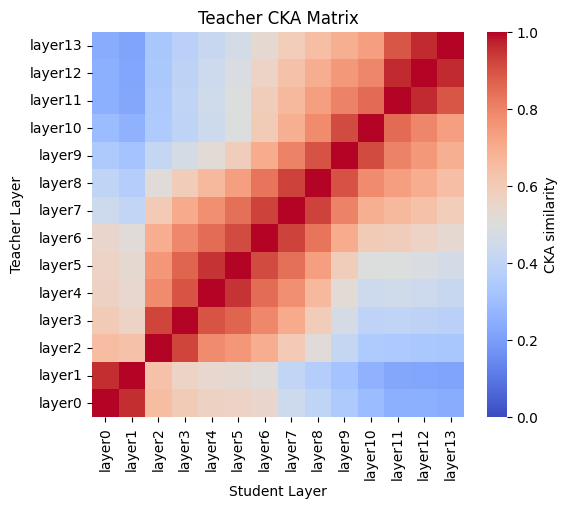

In [3]:
feat_list = get_feature('cifar100', 'vgg16_bn-cifar100-trial_0-epochs_240-bs_64-20251014_162623', 
                   gpu='0', batch_size=64, num_workers=2)
for idx, f in enumerate(feat_list):
    print(idx, f.shape)
    print(f)

cka_mat = compute_cka_matrix(feat_list)
layer_names = [f"layer{i}" for i in range(len(feat_list))]

df = pd.DataFrame(cka_mat, index=layer_names, columns=layer_names)

plot_cka(df, title="Teacher CKA Matrix", cbar=True)
plt.show()

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import silhouette_score

def split_groups_by_cka(feat: list[torch.Tensor], group_num: int) -> list[list[int]]:
    """
    【修正版】
    CKA行列の計算を compute_cka_matrix 関数に任せる
    """
    
    num_layers = len(feat)
    
    if group_num > num_layers:
        return [[i] for i in range(num_layers)]

    print("==> Calculating CKA similarity matrix...")
    # 以前の複雑なループの代わりに、新しい関数を呼ぶだけ
    cka_sim_matrix = compute_cka_matrix(feat)

    # 3. 距離行列に変換 (変更なし)
    dist_matrix = 1.0 - cka_sim_matrix

    print("==> Creating connectivity matrix...")
    # 4. 接続行列の作成 (変更なし)
    positions = np.arange(num_layers).reshape(-1, 1)
    connectivity = kneighbors_graph(
        positions,
        n_neighbors=1,
        mode='connectivity',
        include_self=True
    )
    
    print("==> Running constrained clustering...")
    # 5. クラスタリング実行 (変更なし)
    clusterer = AgglomerativeClustering(
        n_clusters=group_num,
        metric='precomputed',
        linkage='average',
        connectivity=connectivity
    )
    
    labels = clusterer.fit_predict(dist_matrix)
    print(f"Clustering labels: {labels}")

    # 6. 出力の整形 (変更なし)
    groups = [[] for _ in range(group_num)]
    for layer_index, group_label in enumerate(labels):
        groups[group_label].append(layer_index)
        
    sorted_groups = sorted(groups, key=lambda x: x[0])
    
    return sorted_groups


def find_best_group_num(cka_sim_matrix, max_k=None, linkage='average'):
    """
    CKA類似度行列を受け取り、シルエット係数が最大となる
    最適なグループ数 k を探索する。
    順序制約（隣接層のみマージ）を適用する。

    Args:
        cka_sim_matrix (np.ndarray): N x N のCKA類似度行列
        max_k (int, optional): 探索する最大のk。Noneの場合は (層の数 - 1) まで。
        linkage (str): 凝集型クラスタリングの連結方法 ('average', 'complete', 'single')

    Returns:
        (int, float, dict): (最適なk, その時のスコア, 全kのスコア辞書)
    """
    
    # 1. ★最重要★
    # 類似度(Similarity) -> 距離(Distance) に変換
    # CKA=1 (完全類似) -> 距離=0
    # CKA=0 (完全非類似) -> 距離=1
    dist_matrix = 1.0 - cka_sim_matrix
    
    num_layers = dist_matrix.shape[0]

    # 2. 順序制約（接続行列）を作成
    #    (i, i+1) と (i, i-1) のみ接続を許可
    positions = np.arange(num_layers).reshape(-1, 1)
    connectivity = kneighbors_graph(
        positions,
        n_neighbors=1,
        mode='connectivity',
        include_self=True
    )

    if max_k is None:
        max_k = num_layers - 1 # 最大k
    
    # k=1 はシルエット係数を計算できないため、k=2からスタート
    k_range = range(2, max_k + 1)
    
    if not k_range:
        print(f"Error: Cannot test k range. Need at least 3 layers to test k=2.")
        return -1, -1, {}

    scores = {}
    best_k = -1
    best_score = -1 # シルエット係数の初期値 (1が最高)

    print(f"Calculating silhouette scores for k=2 to k={max_k}...")
    
    for k in k_range:
        # 3. 制約付きクラスタリングを実行
        clusterer = AgglomerativeClustering(
            n_clusters=k,
            metric='precomputed', # 距離行列を渡す
            linkage=linkage,
            connectivity=connectivity # ★順序制約
        )
        labels = clusterer.fit_predict(dist_matrix)
        
        # 4. シルエット係数を計算
        #    metric='precomputed' を指定して「距離行列」を渡す
        try:
            score = silhouette_score(
                dist_matrix, 
                labels, 
                metric='precomputed'
            )
            scores[k] = score
            
            if score > best_score:
                best_score = score
                best_k = k
        except ValueError as e:
            # kが大きすぎ/小さすぎなどでラベルが1種類しか作られなかった場合
            print(f"Warning: Could not calculate silhouette score for k={k}. (Labels: {labels})")
            scores[k] = None

    print("Calculation complete.")
    return best_k, best_score, scores

In [7]:
best_k, best_score, scores = find_best_group_num(cka_mat, max_k=10, linkage='average')
print(f"Best k: {best_k} with silhouette score: {best_score:.4f}")
sorted_groups = split_groups_by_cka(feat_list, best_k)
print(sorted_groups)

Calculating silhouette scores for k=2 to k=10...
Calculation complete.
Best k: 6 with silhouette score: 0.6000
==> Calculating CKA similarity matrix...
==> Creating connectivity matrix...
==> Running constrained clustering...
Clustering labels: [3 3 1 1 5 5 0 0 0 2 2 4 4 4]
[[0, 1], [2, 3], [4, 5], [6, 7, 8], [9, 10], [11, 12, 13]]


c:\Users\quter\miniconda3\envs\kd\lib\site-packages\sklearn\cluster\_agglomerative.py:592: UserWarning: the number of connected components of the connectivity matrix is 14 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(
c:\Users\quter\miniconda3\envs\kd\lib\site-packages\sklearn\cluster\_agglomerative.py:592: UserWarning: the number of connected components of the connectivity matrix is 14 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(
c:\Users\quter\miniconda3\envs\kd\lib\site-packages\sklearn\cluster\_agglomerative.py:592: UserWarning: the number of connected components of the connectivity matrix is 14 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(
c:\Users\quter\miniconda3\envs\kd\lib\site-packages\sklearn\cluster\_agglomerative.py:592: UserWarning: the number of connected components of the